In [ ]:
### IMPORT LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
#### IMPORT DATA

In [4]:
data=pd.read_csv("C:\\Users\RAJESH KUMAR\\Documents\\linear regression - non graded\\home price prediction\\train.csv")

In [6]:
data.head(5)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [8]:
data.describe()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,22730.000000,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,11364.500000,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,6561.730145,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,0.000000,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,5682.250000,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,11364.500000,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,17046.750000,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,22729.000000,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


In [ ]:
#### CHECK FOR NULL VALUES 

In [9]:
data.isnull().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [ ]:
##### CHECK FOR OUTLIERS

In [11]:
columns=['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners',
'made','isNewBuilt','hasStormProtector','basement','attic','garage','hasStorageRoom','hasGuestRoom','price' ]

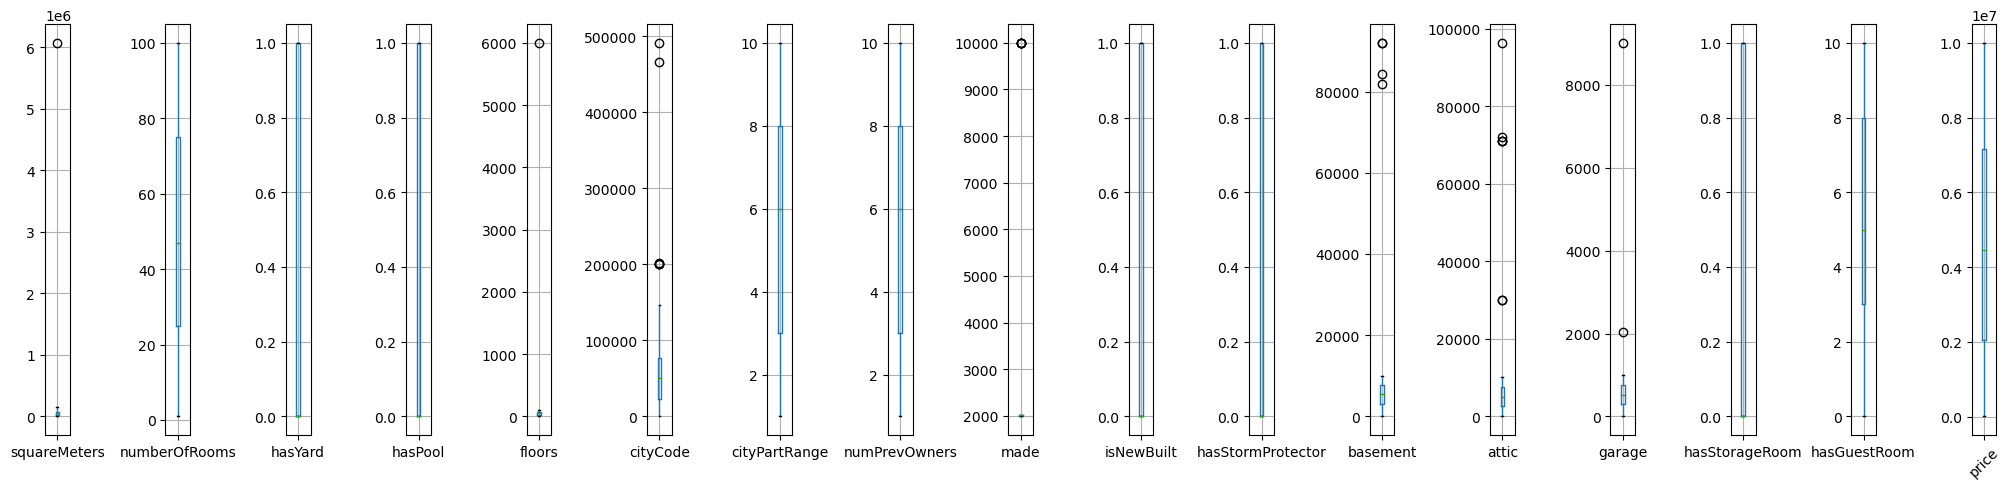

In [17]:
# Create subplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20,5))

for i, column in enumerate(columns):
    data.boxplot(column=column, ax=axes[i])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
##### TREAT OUTLIERS

In [18]:
selected_columns=['squareMeters','floors','cityCode','made','basement','attic','garage']

In [19]:
# Define a function to treat outliers using percentiles
def treat_outliers_percentile(column, lower_percentile=0.25, upper_percentile=0.75):
    q1 = column.quantile(lower_percentile)
    q3 = column.quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, q1, column)
    column = np.where(column > upper_bound, q3, column)
    return column

In [20]:
# Treat outliers in selected columns using percentiles
for column in selected_columns:
    data[column] = treat_outliers_percentile(data[column])

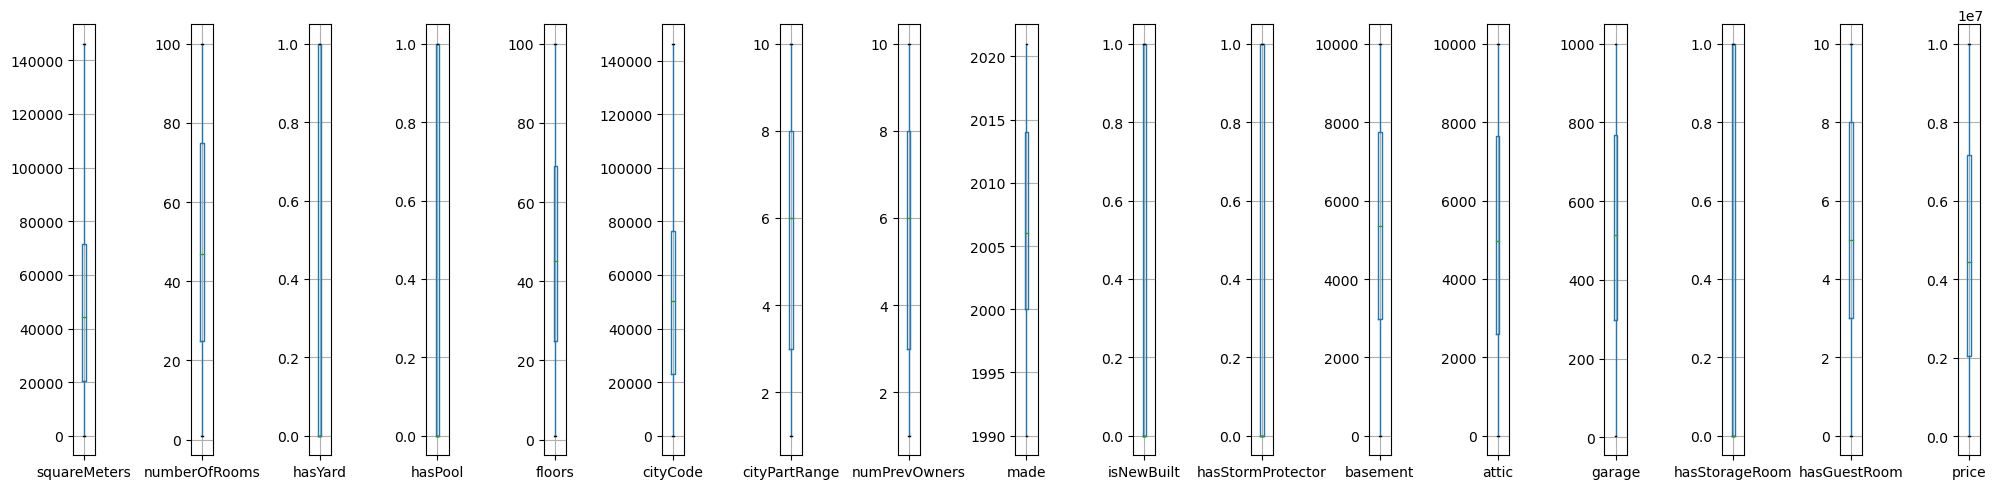

In [23]:
# Create subplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 5))

for i, column in enumerate(columns):
    data.boxplot(column=column, ax=axes[i])
    

plt.tight_layout()
plt.show()

In [ ]:
#### correlation heatmap

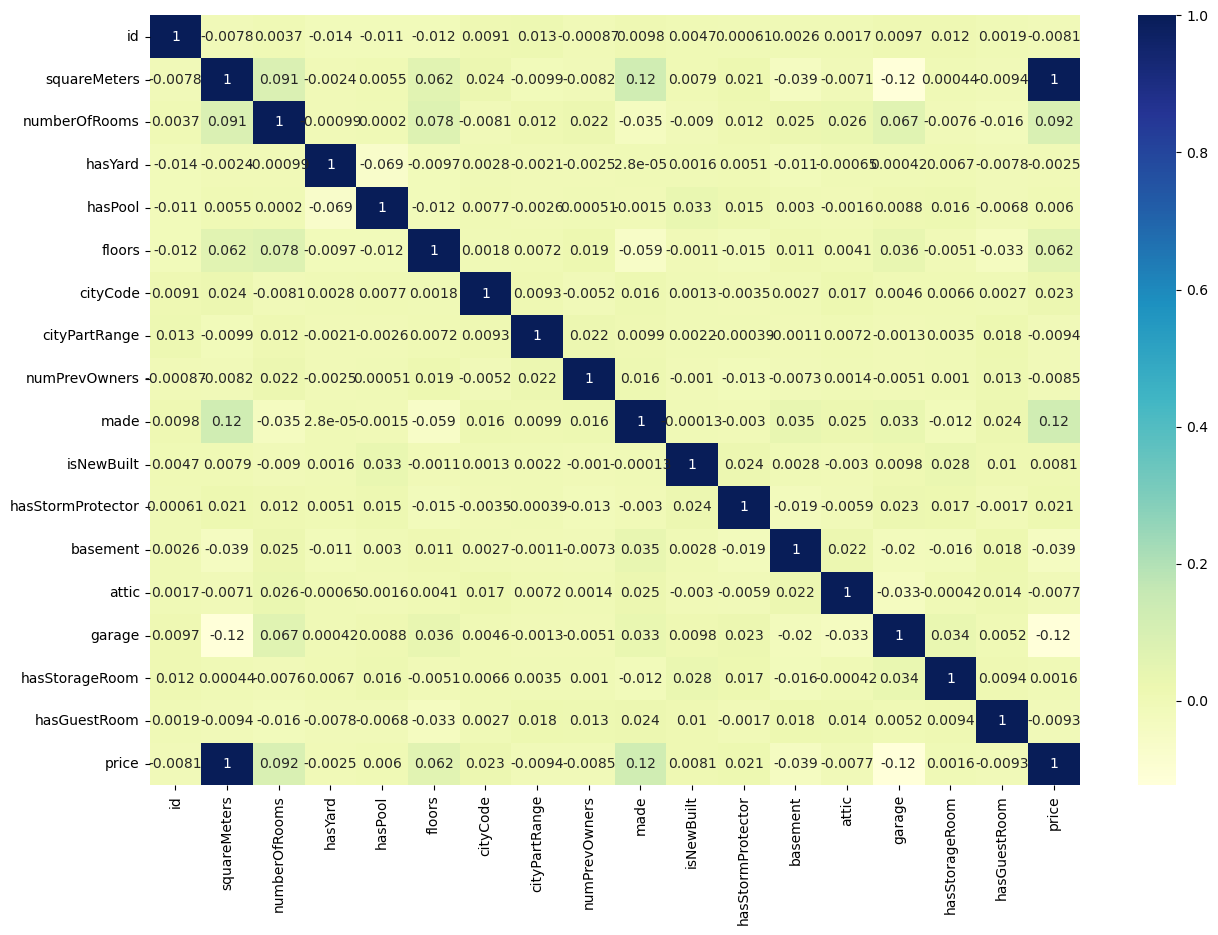

In [26]:
#Correlation using heatmap
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

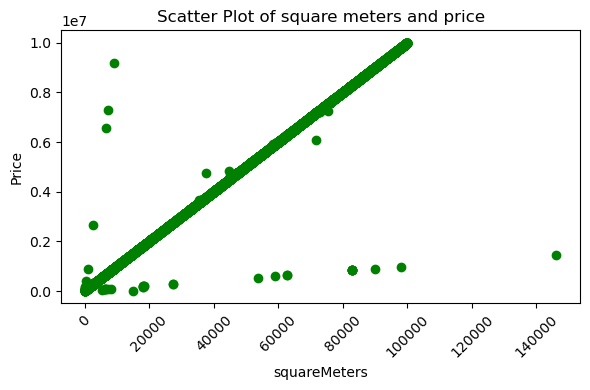

In [29]:
# Create a scatter plot of Electric range vs Price 
plt.figure(figsize=(6, 4))
plt.scatter(data['squareMeters'], data['price'], color='green')
plt.title('Scatter Plot of square meters and price')
plt.xlabel('squareMeters')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Splitting data into Independent and Dependent Variable
X = data.drop('price', axis=1)
y = data['price']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
#### MODEL 1 : LINEAR MODEL 

In [32]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [34]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error:", mse)

R Square :  0.9926081285268217
Mean Squared Error: 62837262365.68234


In [35]:
# Predicting Test Set Results
y_pred = model.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [36]:
# Real Values vs Predicted Values
pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

,Actual Price,Predicted Price
3665,564773.9,575085.70
17727,1576682.6,1582999.59
14009,1659757.8,1675026.40
15355,4228013.9,4233006.39
11789,1659656.4,1669997.34
...,...,...
19820,6841624.1,6841285.78
19362,3619052.8,3607564.42
7212,4830507.5,4831406.58
19338,5449838.8,5439166.43


In [ ]:
#### MODEL 2: RANDOM FOREST REGRESSOR

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [51]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 51108182255.97971
